In [1]:
import numpy as np
import pandas as pd


In [2]:
train=pd.read_csv('training.csv',sep=',',decimal='.')
test=pd.read_csv('test.csv',sep=',',decimal='.')

In [3]:
train.head(20)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [4]:
test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [5]:
train.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [6]:
test.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(train['Months since Last Donation'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
import seaborn as sns


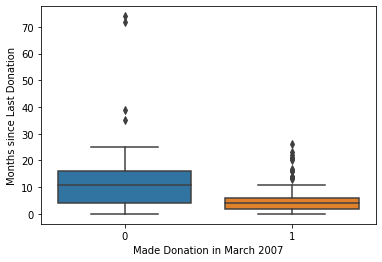

In [9]:
sns.boxplot(data=train,  x='Made Donation in March 2007',y='Months since Last Donation')

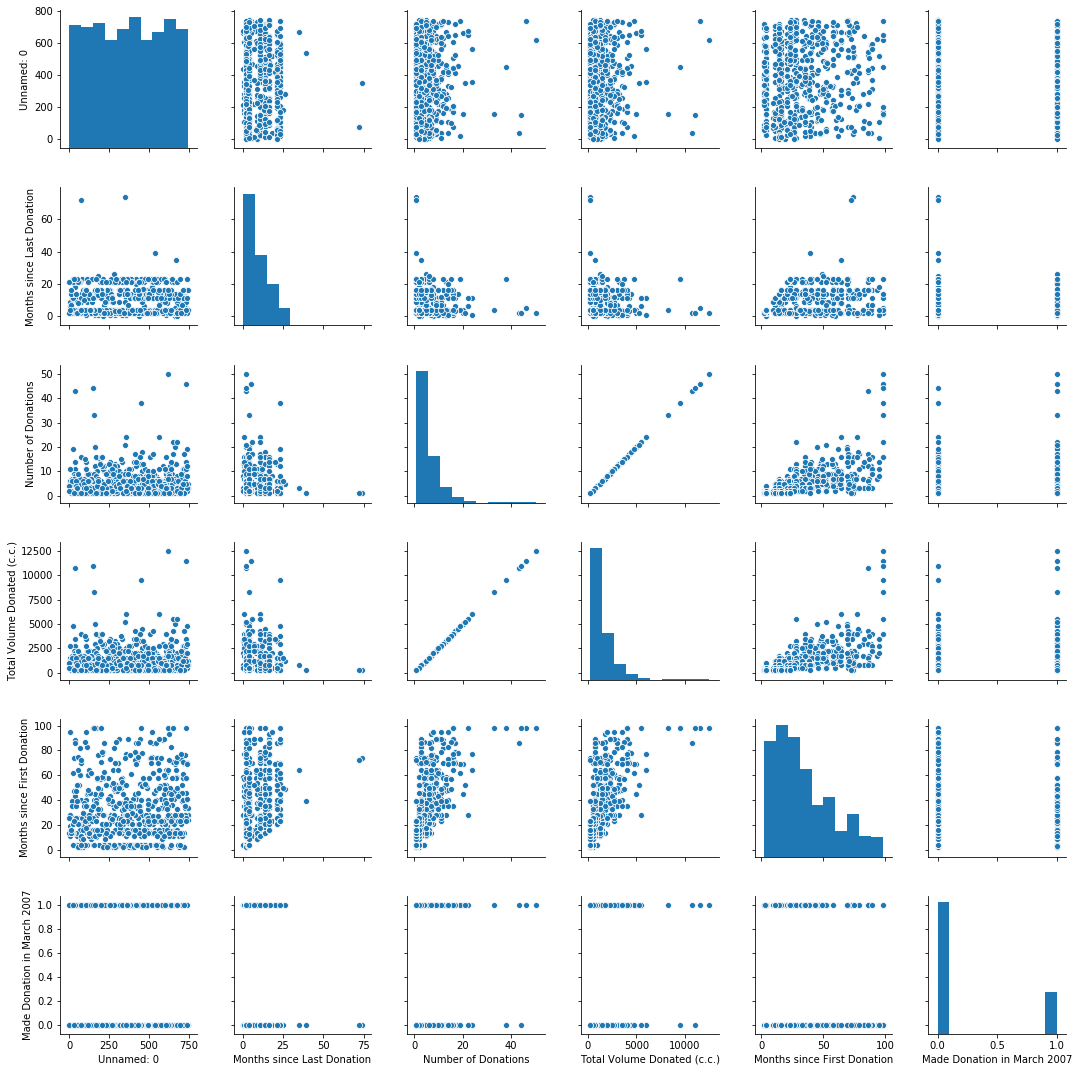

In [10]:
sns.pairplot(train)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=train[['Months since Last Donation','Number of Donations','Months since First Donation']]
Y=train['Made Donation in March 2007']

In [13]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation
0,2,50,98
1,0,13,28
2,1,16,35
3,2,20,45
4,1,24,77


In [14]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [53]:
pd.pivot_table(train, index=['Made Donation in March 2007'], aggfunc='count')

,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Unnamed: 0
Made Donation in March 2007,,,,,
0,438,438,438,438,438
1,138,138,138,138,138


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


In [17]:
#the change in split can change  which model is better
# Demonstrated below
class1=[]
m1=LogisticRegression(solver='lbfgs')
m2=RandomForestClassifier(n_estimators=100)
m3=SVC(gamma='scale')
m4=DecisionTreeClassifier()
m5=KNeighborsClassifier()

for j in np.arange(100)+1:
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=j)
    coll_score=[]
    for i in (m1,m2,m3,m4,m5):
        y_pred=[]
        i.fit(X_train,Y_train)
        Y_pred=i.predict(X_test)
        score=recall_score(Y_pred,Y_test)
        coll_score.append(score.mean())
    
    classifier={0:'LogisticRegression',1:'RandomForestClassifier',2:'SVC',3:'DecisionTreeClassifier',4:'KNearestNeighbor'} 
    class1.append(classifier[np.argmax(coll_score)])

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set 

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set 

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


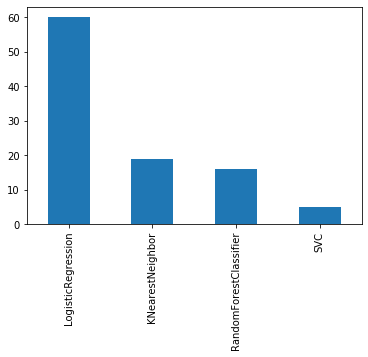

In [18]:
import matplotlib.pyplot as plt
class2=pd.Series(class1)
class2.value_counts().plot(kind='bar')

In [111]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    xgb.XGBClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Precision",'neglogloss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    name = clf.__class__.__name__
   
    precision_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='precision')
    precision=precision_array.mean()
    
    neg_log_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='neg_log_loss')
    neg_log=neg_log_array.mean()

    log_entry = pd.DataFrame([[name,precision,neg_log]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

In [119]:
log['neglogloss']=log['neglogloss'].apply(lambda x : -x)

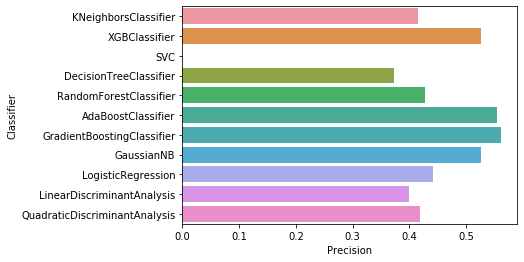

In [124]:

import matplotlib.pyplot as plt

sns.barplot(data=log,x='Precision',y='Classifier')



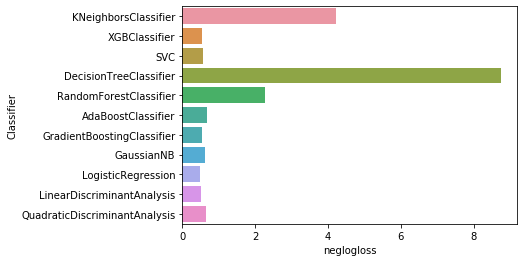

In [123]:
sns.barplot(data=log,x='neglogloss',y='Classifier')


In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [47]:
#tuning parameter using gridsearch
clf_logit=LogisticRegression()
parameter_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cross_validation=StratifiedKFold(n_splits=10)

grid_search= GridSearchCV(clf_logit,
                          param_grid=parameter_grid,
                          cv=cross_validation)

grid_search.fit(X_train,Y_train)

print('Best Score :',grid_search.best_score_)
print('Best Parameters : ', grid_search.best_params_)

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Best Score : 0.7615740740740741
Best Parameters :  {'solver': 'newton-cg'}


C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [55]:
from sklearn.metrics import classification_report

In [61]:
def model_rep(clf):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    print('the classification report is:')
    print(classification_report(Y_pred,Y_test))
    print(pd.crosstab(Y_pred,Y_test))

In [192]:
xgb3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=7,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.5,
 colsample_bytree=0.6,
 reg_alpha=0.0005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_rep(xgb3)

the classification report is:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       118
           1       0.44      0.54      0.48        26

   micro avg       0.79      0.79      0.79       144
   macro avg       0.67      0.69      0.68       144
weighted avg       0.81      0.79      0.80       144

Made Donation in March 2007    0   1
row_0                               
0                            100  18
1                             12  14


In [65]:
from sklearn.model_selection import cross_validate   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [195]:
scoring = ['precision', 'recall', 'f1','roc_auc']
param_test1 = {
 'max_depth':range(1,5,1),
 'min_child_weight':range(15,20,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring=scoring,refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_

{'max_depth': 2, 'min_child_weight': 18}

In [185]:
param_test2 = {
 'gamma':[i/100.0 for i in range(10,30,1)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
 min_child_weight=17, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring=scoring, refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_

{'gamma': 0.18}

In [189]:
param_test3 = {
 'subsample':[i/10.0 for i in range(1,10)],
 'colsample_bytree':[i/10.0 for i in range(1,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=1,
 min_child_weight=17, gamma=0.18, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring=scoring, refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch3.fit(X_train,Y_train)
gsearch3.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.4}

In [188]:
param_test4 = {
  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
 min_child_weight=9, gamma=0.18, subsample=0.4, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring=scoring, refit='precision',n_jobs=4,iid=False, cv=5,return_train_score=False)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_

{'reg_alpha': 0.1}

In [191]:
print(xgb.XGBClassifier())
print(model_rep(xgb.XGBClassifier()))

print('*'*90)
print(gsearch4.best_estimator_)
print(model_rep(gsearch4.best_estimator_))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
the classification report is:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       128
           1       0.38      0.75      0.50        16

   micro avg       0.83      0.83      0.83       144
   macro avg       0.67      0.80      0.70       144
weighted avg       0.90      0.83      0.86       144

Made Donation in March 2007    0   1
row_0                               
0                            108  20
1                              4  12
None
******************************************************************************************
XGBClassifi

the classification report is:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       126
           1       0.31      0.56      0.40        18

   micro avg       0.79      0.79      0.79       144
   macro avg       0.62      0.69      0.64       144
weighted avg       0.85      0.79      0.81       144

Made Donation in March 2007    0   1
row_0                               
0                            104  22
1                              8  10


In [173]:
scoring = ['precision', 'recall', 'f1','roc_auc']
param_test1 = {
                 'max_depth':range(5,7,1), 
                'min_samples_split':range(200,250,1)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
                learning_rate=0.1, 
                n_estimators=100, 
                subsample=1.0, 
                criterion='friedman_mse', 
                min_samples_split=2, 
                min_samples_leaf=1, 
                min_weight_fraction_leaf=0.0, 
                max_depth=3, 
                min_impurity_decrease=0.0, 
                min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                presort='auto', 
                validation_fraction=0.1, 
                n_iter_no_change=None, 
                tol=0.0001), 
                        
                        param_grid = param_test1, 
                        scoring=scoring,refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_

{'max_depth': 6, 'min_samples_split': 222}

In [174]:
param_test1 = {
     'min_samples_leaf':range(100,150,1)
}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
                learning_rate=0.1, 
                n_estimators=100, 
                subsample=1.0, 
                criterion='friedman_mse', 
                min_samples_split=222, 
                min_samples_leaf=8, 
                min_weight_fraction_leaf=0.0, 
                max_depth=6, 
                min_impurity_decrease=0.0, 
                min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                presort='auto', 
                validation_fraction=0.1, 
                n_iter_no_change=None, 
                tol=0.0001), 
                        
                        param_grid = param_test1, 
                        scoring=scoring,refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_

{'min_samples_leaf': 125}

In [175]:
param_test1 = {
     'min_samples_leaf':range(100,150,1)
}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
                learning_rate=0.1, 
                n_estimators=100, 
                subsample=1.0, 
                criterion='friedman_mse', 
                min_samples_split=222, 
                min_samples_leaf=125, 
                min_weight_fraction_leaf=0.0, 
                max_depth=6, 
                min_impurity_decrease=0.0, 
                min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                presort='auto', 
                validation_fraction=0.1, 
                n_iter_no_change=None, 
                tol=0.0001), 
                        
                        param_grid = param_test1, 
                       scoring=scoring,refit='precision',n_jobs=4,iid=False, cv=10,return_train_score=False)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_

{'min_samples_leaf': 125}

In [198]:
clf=GradientBoostingClassifier(
                learning_rate=0.1, 
                n_estimators=100, 
                subsample=1.0, 
                criterion='friedman_mse', 
                min_samples_split=222, 
                min_samples_leaf=125, 
                min_weight_fraction_leaf=0.0, 
                max_depth=6, 
                min_impurity_decrease=0.0, 
                min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                presort='auto', 
                validation_fraction=0.1, 
                n_iter_no_change=None, 
                tol=0.0001)
print(clf)
print(model_rep(clf))

print('-'*90)
print('*'*90)
print('GBC without any input')
print(model_rep(GradientBoostingClassifier()))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=125, min_samples_split=222,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
the classification report is:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       133
           1       0.25      0.73      0.37        11

   micro avg       0.81      0.81      0.81       144
   macro avg       0.61      0.77      0.63       144
weighted avg       0.92      0.81      0.85       144

Made Donation in March 2007    0   1
row_0                               
0                   

In [200]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [204]:
#randomized search


clf=GradientBoostingClassifier(
                learning_rate=0.1, 
                n_estimators=100, 
                subsample=1.0, 
                criterion='friedman_mse', 
                min_samples_split=222, 
                min_samples_leaf=125, 
                min_weight_fraction_leaf=0.0, 
                max_depth=6, 
                min_impurity_decrease=0.0, 
                min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                presort='auto', 
                validation_fraction=0.1, 
                n_iter_no_change=None, 
                tol=0.0001)

parameter_grid={'max_depth':range(1,10,1),
                 
                'min_samples_split':range(10,1000,50),
                'criterion':['friedman_mse','mae']
                    }

cross_validation=StratifiedKFold(n_splits=10)

grid_search= RandomizedSearchCV(clf,
                          param_distributions=parameter_grid,
                          cv=cross_validation,
                            n_iter=100)

grid_search.fit(X_train,Y_train)

print('Best Score :',grid_search.best_score_)
print('Best Parameters : ', grid_search.best_params_)

Best Score : 0.7800925925925926
Best Parameters :  {'min_samples_split': 160, 'max_depth': 2, 'criterion': 'friedman_mse'}


C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [205]:
#Randomized search

#tuning parameter using gridsearch

xgb3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.5,
 colsample_bytree=0.6,
 reg_alpha=0.0005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

parameter_grid={'max_depth':[3,7,9],
                 'min_child_weight':[1,3,5],
                'gamma':[i/10.0 for i in range(0,5)],
                 'subsample':[i/100.0 for i in range(80,100,5)],
                 'colsample_bytree':[i/100.0 for i in range(50,70,5)],
                'reg_alpha':[5e-06,1e-05,5e-04,1e-04]
                    }

cross_validation=StratifiedKFold(n_splits=10)

grid_search= RandomizedSearchCV(xgb3,
                          param_distributions=parameter_grid,
                          cv=cross_validation,
                            n_iter=100)

grid_search.fit(X,y)

print('Best Score :',grid_search.best_score_)
print('Best Parameters : ', grid_search.best_params_)

NameError: name 'y' is not defined